# Testing HotVis on the flights paths

In [1]:
import csv
from HotVisFunctions import *
from SGDStressFunctions import *
import pandas as pd
import numpy as np

/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:

def split_path_data(data: pp.PathData, training_percentile: float):
    training_data = pp.PathData(data.mapping)
    test_data = pp.PathData(data.mapping)
    split_indices = torch.rand(data.num_paths)
    for i in range(data.num_paths):
        if split_indices[i] <= training_percentile:
            training_data.append_walk(data.get_walk(i))
        else:
            test_data.append_walk(data.get_walk(i))
    return training_data, test_data


In [3]:
def from_ngram(file: str, sep: str = ",") -> pp.PathData:
    with open(file, "r", encoding="utf-8") as f:
        paths = [line.strip().split(sep) for line in f if len(line.strip().split(sep)) > 1]
        
    weights = [1.0] * len(paths)

    mapping = pp.IndexMap()
    mapping.add_ids(np.unique(np.concatenate([np.array(path) for path in paths])))

    pathdata = pp.PathData(mapping)
    pathdata.append_walks(node_seqs=paths, weights=weights)

    return pathdata

In [4]:
# load flights
flights = from_ngram("graphs/Flights/flights.ngram")
#flights, flights = split_path_data(flights, 0.7)

In [ ]:
print(flights.get_walk(0))

('ABQ', 'BWI', 'STL', 'ABQ')


In [6]:
layout_2 = HotVis(flights, 2, 50000, 1, alpha= torch.tensor([1, 0.5]), force=10)
layout_3 =  HotVis(flights, 3, 50000, 1, alpha= torch.tensor([1, 0.5, 0.3]), force=10)
layout_5 =  HotVis(flights, 5, 50000, 1, alpha= torch.tensor([1, 0.5, 0.3, 0.25, 0.2]), force=10)

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(ho_graph.data.edge_index, device=device)
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_sequence = torch.tensor(ho_graph.data.node_sequence, device=device)
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nodes_start = torch.ten

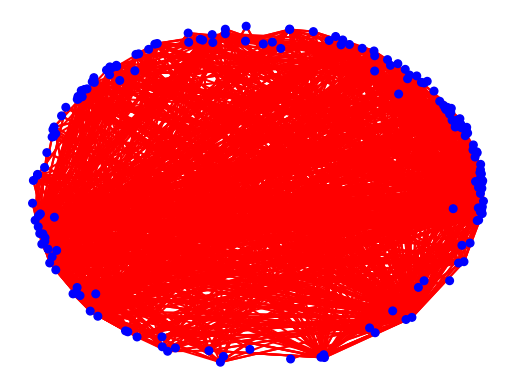

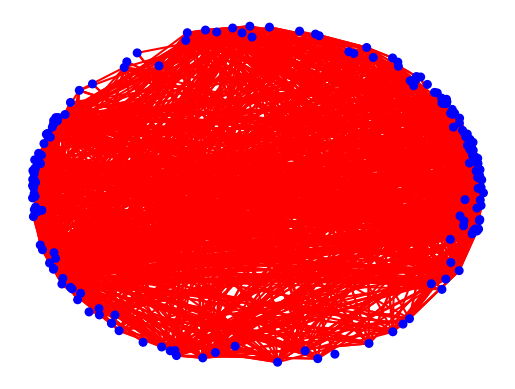

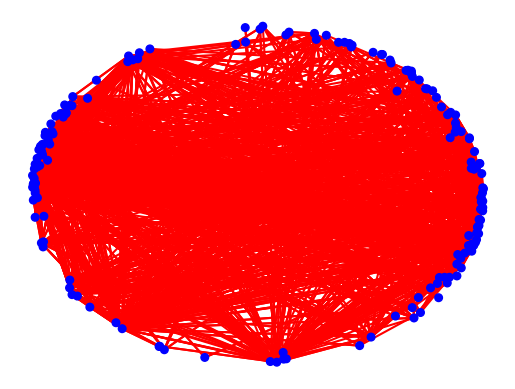

In [7]:
graph = pp.MultiOrderModel.from_PathData(flights, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [8]:
print(edge_crossing(flights, layout_2))
print(edge_crossing(flights, layout_3))
print(edge_crossing(flights, layout_5))

tensor(174921.)
tensor(168996.)
tensor(176172.)


In [9]:
print(causal_path_dispersion(flights, layout_2, 3))
print(causal_path_dispersion(flights, layout_3, 3))
print(causal_path_dispersion(flights, layout_5, 3))

tensor(0.7947, dtype=torch.float64)
tensor(0.7676, dtype=torch.float64)
tensor(0.7693, dtype=torch.float64)


In [10]:
print(closeness_eccentricity(flights, layout_2, 3, 0.1))
print(closeness_eccentricity(flights, layout_3, 3, 0.1))
print(closeness_eccentricity(flights, layout_5, 3, 0.1))

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:213: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path), device=device)


tensor(1.0570, dtype=torch.float64)
tensor(1.0146, dtype=torch.float64)
tensor(1.0364, dtype=torch.float64)
